Upload all the crap

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager as fm

# machine learning

sns.set_style("white")
sns.set_style("ticks")
matplotlib.rcParams.update({'font.size': 18})

In [2]:
#define a function to plot on the same frame two different sns plots

def plot2sets(df1,df2,df3,df4):
    fig = plt.figure(figsize=(8,8))
    plt.ion()
    plt.show()
    p = sns.JointGrid(x = df1, y = df2)
    p = p.plot_joint(plt.scatter,s=1, c='r', alpha=0.2,marker='x')
    p.x = df3
    p.y = df4
    x_range=[min([min(df1),min(df3)]),max([max(df1),max(df3)])]
    y_range=[min([min(df2),min(df4)]),max([max(df2),max(df4)])]
    p.plot_joint(plt.scatter,s=3, c='cornflowerblue', alpha=0.2)
    p.ax_marg_x.hist(df1,alpha = 0.5,color='r',range=x_range,bins=40)
    p.ax_marg_y.hist(df2,orientation = 'horizontal', alpha = 0.5,color='r',range=y_range,bins=20)
    p.ax_marg_x.hist(df3, alpha = 0.7,color='cornflowerblue',range=x_range,bins=40)#,range = (np.min(df['x']), np.max(df['x'])) )
    p.ax_marg_y.hist(df4,orientation = 'horizontal',alpha = 0.7,color='cornflowerblue',range=y_range,bins=20)#range = (np.min(df['y']), np.max(df['y'])))

Import the data

In [5]:
df= pd.read_csv('../kickstarter_clean.csv',encoding='utf-8')

In [6]:
df1=df.groupby('main_cat')['name'].count().reset_index(name='count')

In [7]:
# Looking at how many campaigns there are in each main category

df1=df.groupby('main_cat')['name'].count().reset_index(name='count')
df1.sort_values(by='count', ascending=[0])

,main_cat,count
10,music,20289
6,film & video,17522
0,art,13172
12,publishing,12456
13,technology,11514
7,food,11135
8,games,7174
5,fashion,6796
1,comics,5709
14,theater,4484


In [8]:
df1=df1[df1['count']>100].sort_values(by='count', ascending=[1])

Making a pie chart

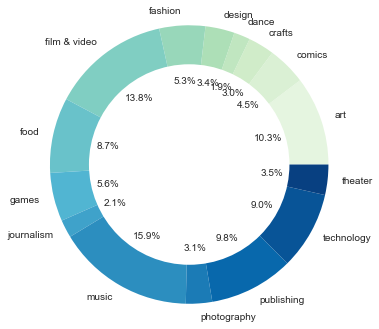

In [8]:
matplotlib.rcParams['font.size'] = 10.0
# The slices will be ordered and plotted counter-clockwise.
labels = df1[df1['count']>100]['main_cat']
sizes = df1[df1['count']>100]['count']

fig = plt.figure(1, figsize=(5.5,5.5))
ax = fig.add_subplot(111)
ax.axis('equal')


#explode = (0, 0, 0, 0)  # explode a slice if required
cmap = plt.cm.GnBu
colors = cmap(np.linspace(0.1, 1, 15))#[::-1]

patches, texts, autotexts =ax.pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', 
       shadow=False)
 
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.72, fc='white',linewidth=1.25)
#fig = plt.gcf()
fig.gca().add_artist(centre_circle)


proptease = fm.FontProperties()
proptease.set_size('medium')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.savefig('cat_donut.png', dpi=250,bbox_inches='tight')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show() 

Making a histogram with ther ratio of funded campaigns

In [9]:
dfplot=df.groupby(['main_cat'])['y'].mean().reset_index(name='mean')

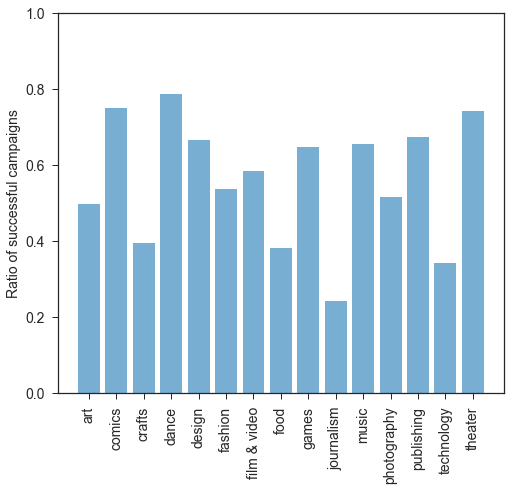

In [10]:
A = dfplot['mean']
x = range(len(A))

fontsize2use = 14

fig = plt.figure(figsize=(8,7))
plt.xticks(fontsize=fontsize2use) 
plt.yticks(fontsize=fontsize2use)  
plt.bar(x, A, color = '#1f78b4', alpha=0.6)
plt.xticks(x, dfplot['main_cat'],rotation='vertical')
plt.ylim(0,1)
#plt.xlabel('Day of the Year',fontsize=18)
plt.ylabel('Ratio of successful campaigns',fontsize=14)
plt.savefig("funded_ratio.png",bbox_inches='tight')
plt.show()

In [14]:
df['log10(goal in USD)']=np.log10(df['goal'])

In [15]:
df['funded ratio']=df['ratio']
df['log10(funded ratio)']=np.log10(df['ratio']+0.0000001)

In [74]:
#defining two dataframes, one for campaigns not funded one for funded

df_nf=df[(df['ratio']<1)&(df['backers_count']>0)].reset_index()
df_f=df[(df['ratio']<15)&(df['ratio']>1)&(df['backers_count']>0)].reset_index()

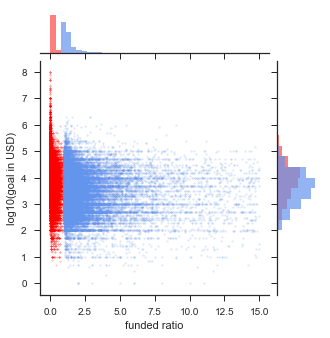

In [76]:
matplotlib.rcParams.update({'font.size': 50})
fig = plt.figure(figsize=(8,8))
cat1='funded ratio'
cat2='log10(goal in USD)'
plot2sets(df_nf[cat1],df_nf[cat2],df_f[cat1],df_f[cat2])
plt.savefig("scatter_goal.png",bbox_inches='tight',dpi=500)
plt.show()